In [1]:
import cv2
import numpy as np
import random
from collections import OrderedDict

import nbimporter
import util
from least_squares_M_solver import *
from svd_M_solver import *
from best_M import *
from least_squares_F_solver import *

Importing Jupyter notebook from util.ipynb
Importing Jupyter notebook from least_squares_M_solver.ipynb
Importing Jupyter notebook from svd_M_solver.ipynb
Importing Jupyter notebook from best_M.ipynb
Importing Jupyter notebook from least_squares_F_solver.ipynb


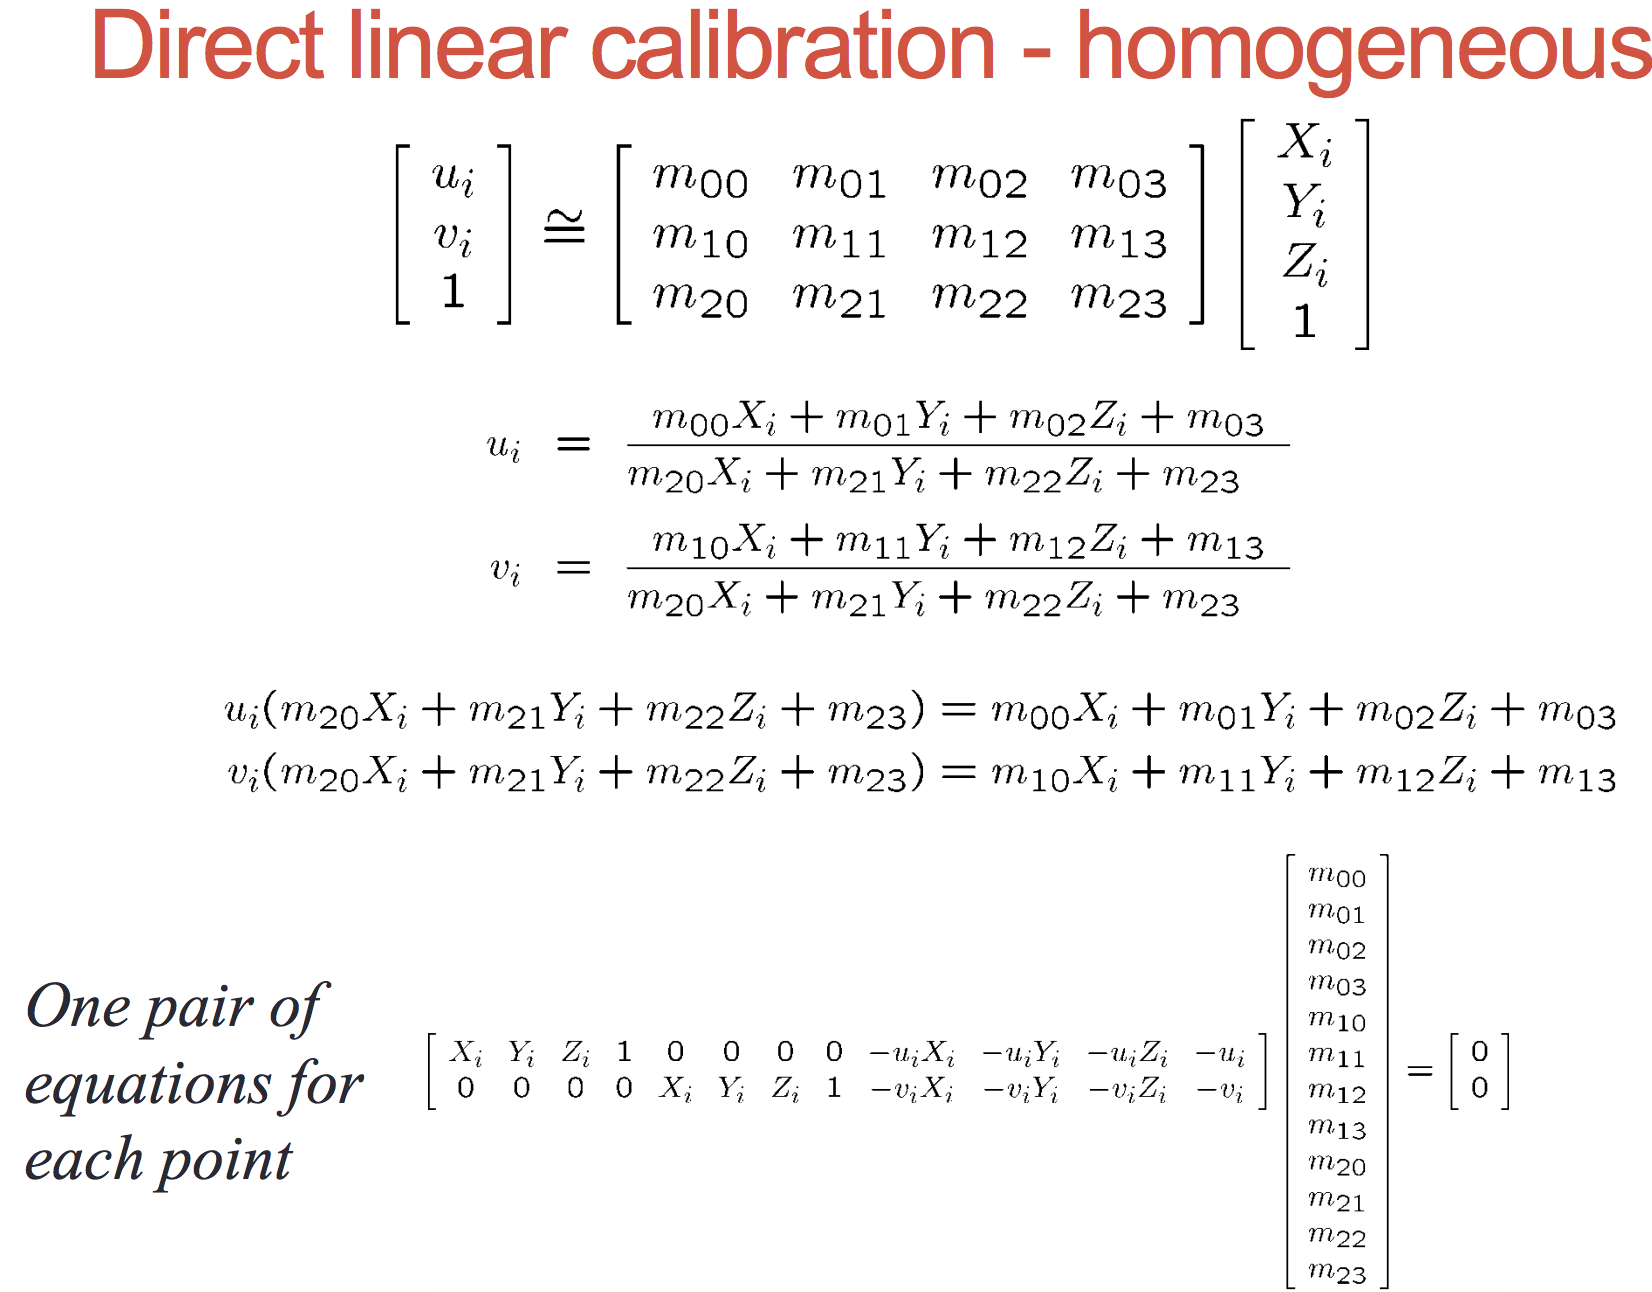

In [2]:
# projection_matrix M calculation
from IPython.display import Image
Image(filename='../input/projection_matrix.png', width = 550)

In [3]:
# Predict 2d point by multiplying M and a 3d point
def predict_pt(M, actual_pt_3d):
    predicted_pt_2d = np.dot(M, np.append(actual_pt_3d, 1))
    # homogeneous 2D point < us, vs, s > to its inhomogeneous version by dividing by s
    predicted_pt_2d = predicted_pt_2d[:2] / predicted_pt_2d[2]
    return predicted_pt_2d

# Calculate distance between actual and predicted 2d point
def dist_between(actual_pt_2d, predicted_pt_2d):
    return np.linalg.norm(actual_pt_2d - predicted_pt_2d)

In [4]:
# Estimate camera projection matrix
def ps3_1a():
    pts_2d = util.load_file('pts2d-norm-pic_a.txt')
    pts_3d = util.load_file('pts3d-norm.txt')
    
    # test results using a least squares solver
    M, res = least_squares_M_solver(pts_2d, pts_3d)
    pt_index = -1
    predicted_pt_2d = predict_pt(M, pts_3d[pt_index])
    residual = dist_between(pts_2d[pt_index], predicted_pt_2d)
    
    print('Results with least squares:')
    print('M=\n%s'%M)
    print('Actual Point: %s\nPredicted point: %s'%(pts_2d[pt_index], predicted_pt_2d))
    print('Residual (Distance between actual and predicted point): %.4f\n'%residual)
    
    # test results using SVD solver
    M = svd_M_solver(pts_2d, pts_3d)
    predicted_pt_2d = predict_pt(M, pts_3d[pt_index])
    residual = dist_between(pts_2d[pt_index], predicted_pt_2d)
    
    print('Results with SVD:')
    print('M=\n%s'%M)
    print('Actual Point: %s\nPredicted point: %s'%(pts_2d[pt_index], predicted_pt_2d))
    print('Residual (Distance between actual and predicted point): %.4f\n'%residual)
    
ps3_1a()

Results with least squares:
M=
[[ 0.76785833 -0.49384797 -0.02339789  0.00674443]
 [-0.08521339 -0.09146819 -0.90652329 -0.08775678]
 [ 0.18265015  0.2988292  -0.07419244  1.        ]]
Actual Point: [ 0.1406     -0.45269999]
Predicted point: [ 0.14190583 -0.45183984]
Residual (Distance between actual and predicted point): 0.0016

Results with SVD:
M=
[[ 0.45827553 -0.29474238 -0.0139575   0.00402579]
 [-0.05085589 -0.05458471 -0.54105991 -0.05237592]
 [ 0.10900958  0.1783455  -0.04426783  0.59682047]]
Actual Point: [ 0.1406     -0.45269999]
Predicted point: [ 0.14190602 -0.451843  ]
Residual (Distance between actual and predicted point): 0.0016



In [5]:
def ps3_1b(disp=True):
    pts_2d = util.load_file('pts2d-pic_a.txt')
    pts_3d = util.load_file('pts3d.txt')
    # test results using a least squares solver for dif. number of calibration
    # points for 10 iterations
    Ms = [0, 0, 0]
    residuals = [0, 0, 0]
    num_pts = [8, 12, 16]
    for i in range(len(num_pts)):
        Ms[i], residuals[i] = best_M(pts_2d, pts_3d, num_calibration_pts=num_pts[i], num_test_pts=4, iterations=10)
        
    # Take (res, m) such that residual is minimum among the three residuals
    res, M = min((res, M) for (res, M) in zip(residuals, Ms))
    
    if disp:
        print('Residuals:\nfor 8 pts: %.5f\nfor 12 pts: %.5f\nfor 16 pts: %.5f\n'%(
            residuals[0], residuals[1], residuals[2]))
        print('Best Projection Matrix\nM =\n%s\n'%M)
    return M, res

ps3_1b();

Residuals:
for 8 pts: 2.37284
for 12 pts: 2.44403
for 16 pts: 1.65807

Best Projection Matrix
M =
[[ -2.33037877e+00  -1.10128418e-01   3.36368054e-01   7.36075073e+02]
 [ -2.33054012e-01  -4.78369027e-01   2.08477521e+00   1.53973236e+02]
 [ -1.26689405e-03  -2.06461782e-03   5.15464228e-04   1.00000000e+00]]



In [6]:
# estimate camera center position in the 3D world coordinates
def ps3_1c():
    M,_ = ps3_1b(disp=False)
    # M = [Q|m4]
    Q = M[:, :3]
    m4 = M[:, 3]
    C = np.dot(-np.linalg.inv(Q), m4)
    print('Center of Camera = %s\n'%C)
    
ps3_1c()

Center of Camera = [ 305.85473546  304.21579796   30.14069258]



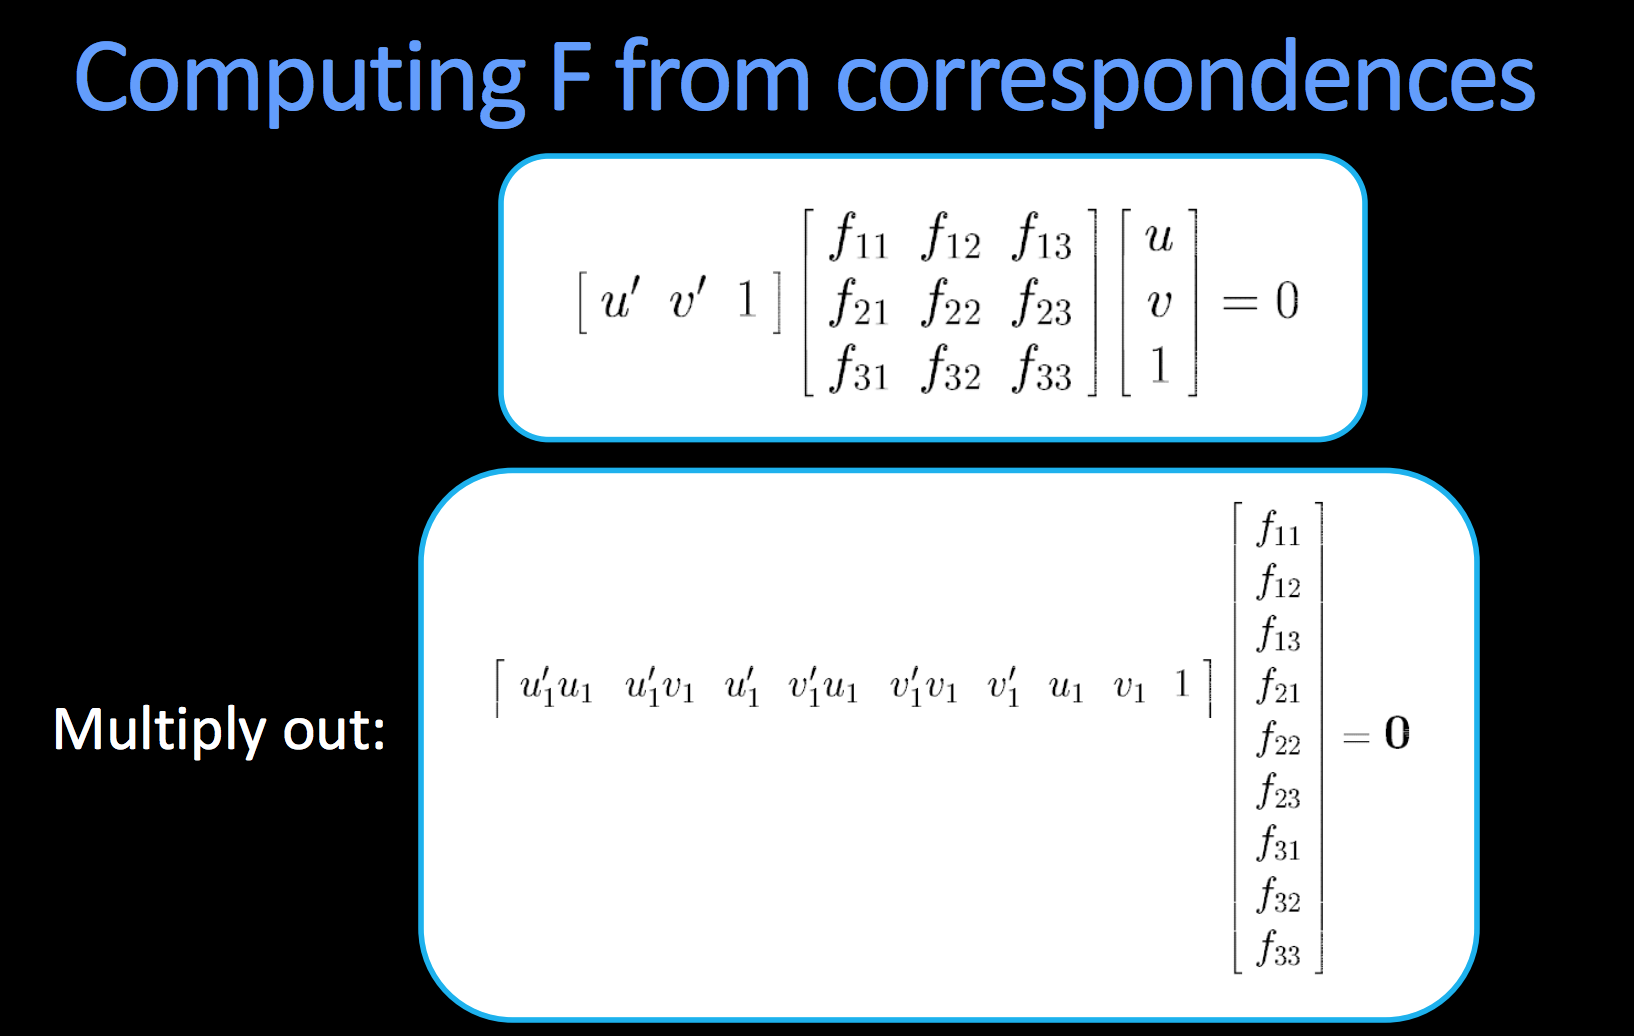

In [7]:
# projection_matrix M calculation
from IPython.display import Image
Image(filename='../input/fundamental_matrix.png', width = 550)

In [8]:
# estimate the Fundamental Matrix between pic_a and pic_b
def ps3_2a(disp=True):
    pts_a = util.load_file('pts2d-pic_a.txt')
    pts_b = util.load_file('pts2d-pic_b.txt')
    F = least_squares_F_solver(pts_a, pts_b)
    if disp:
        print('Fundametal Matrix with Rank=3: \n%s\n'%F)
    return F

ps3_2a();

Fundametal Matrix with Rank=3: 
[[ -6.60675944e-07   7.90642197e-06  -1.88480992e-03]
 [  8.82674944e-06   1.21863596e-06   1.72276843e-02]
 [ -9.08539064e-04  -2.64201801e-02   1.00000000e+00]]



In [9]:
# reduce the rank of Fundamental Matrix from 3 to 2
def ps3_2b(disp=True):
    F = ps3_2a(disp=False)
    U,S,V = np.linalg.svd(F)
    
    S[-1] = 0
    S = np.diag(S)
    F = np.dot(np.dot(U,S), V)
    if disp:
        print('Fundametal Matrix with Rank=2: \n%s\n'%F)
    return F

ps3_2b();

Fundametal Matrix with Rank=2: 
[[ -5.35883058e-07   7.89972529e-06  -1.88480998e-03]
 [  8.83820595e-06   1.21802118e-06   1.72276843e-02]
 [ -9.08539027e-04  -2.64201801e-02   1.00000000e+00]]

